In [1]:
#Importing packages
import seaborn as sns
import numpyro.distributions as dist
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
from jax import random

rng_key = random.PRNGKey(3)
rng_key, rng_key_ = random.split(rng_key)

Gamma Distribution: \
2 Typical parameterisations:
 1. Shape parameter $k$ and scale parameter $\theta$
 2. Shape parameter $\alpha = k$ and rate parameter $\beta = \dfrac{1}{\theta}$
\
In Numpyro they use concentration ($\alpha$) and rate ($\beta$).
$$f(x)=\dfrac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}$$

In Scipy they use shape ($\alpha$) and scale ($\dfrac{1}{\beta}$)

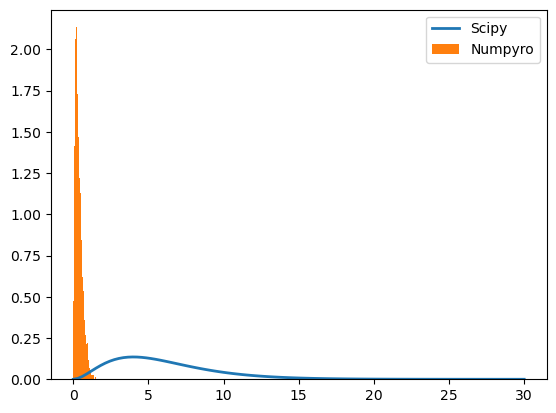

In [10]:
fig, ax = plt.subplots()
xs = np.linspace(0.01,30,100)
ys = gamma.pdf(xs, 3, 0, 1/0.5)
ax.plot(xs, ys, lw=2, label='Scipy')
plt.hist(dist.Gamma(2.0,5.5).sample(rng_key,(10000,)),density=True,bins=100,label='Numpyro')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Varying Alpha')

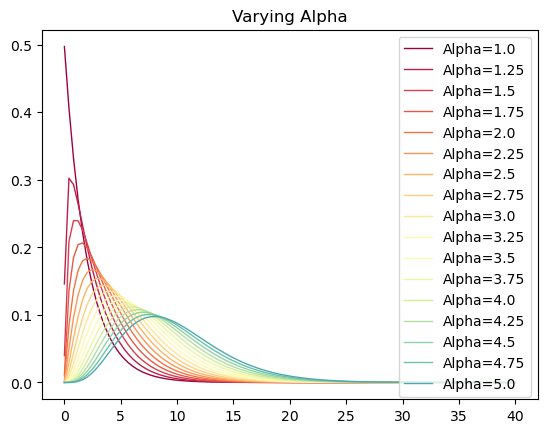

In [3]:
fig, ax = plt.subplots()
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,20)))
xs = np.linspace(0.01,40,100)

alpha,beta = 3.0,0.5
for alpha_adjustment in np.arange(-2.0,2.25,0.25):
	alpha_new = alpha + alpha_adjustment
	ys = gamma.pdf(xs, alpha_new, 0, 1/beta)
	ax.plot(xs, ys, lw=1, label=f'Alpha={round(alpha_new,2)}')
plt.legend()
plt.title('Varying Alpha')

Text(0.5, 1.0, 'Varying Beta')

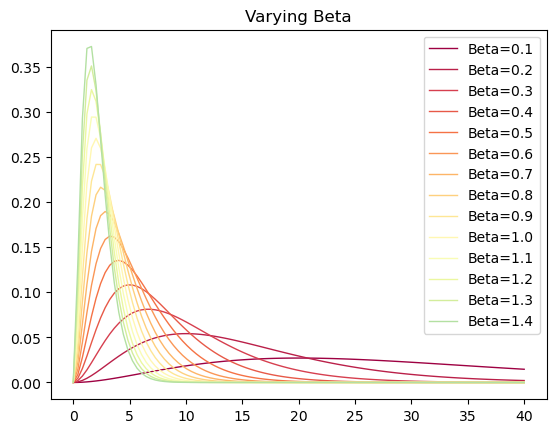

In [4]:
fig, ax = plt.subplots()
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,20)))
xs = np.linspace(0.01,40,100)

alpha,beta = 3.0,0.5
for beta_adjustment in np.arange(-0.4,1.0,0.1):
	beta_new = beta + beta_adjustment
	ys = gamma.pdf(xs, alpha, 0, 1/beta_new)
	ax.plot(xs, ys, lw=1, label=f'Beta={round(beta_new,2)}')
plt.legend()
plt.title('Varying Beta')

Text(0.5, 1.0, 'Varying Alpha and Beta')

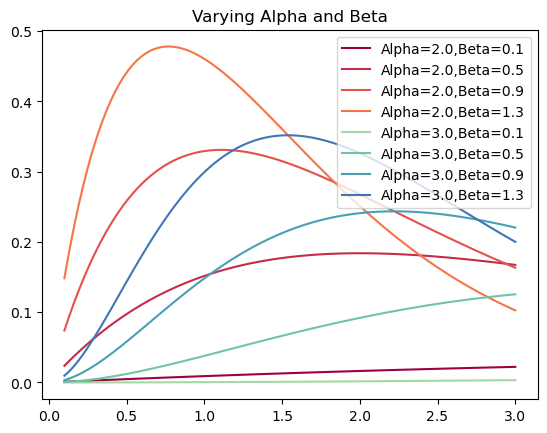

In [5]:
fig, ax = plt.subplots()
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,9)))
xs = np.linspace(0.1,3,100)
alpha,beta = 3.0,0.5
alpha_counter = 0
for alpha_adjustment in np.arange(-1.0,1,1):
	ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,15)[alpha_counter:]))
	alpha_counter += 10
	for beta_adjustment in np.arange(-0.4,1.0,0.4):
		alpha_new = alpha + alpha_adjustment
		beta_new = beta + beta_adjustment
		ys = gamma.pdf(xs, alpha_new, 0, 1/beta_new)
		plt.plot(xs,ys,label=f'Alpha={round(alpha_new,2)},Beta={round(beta_new,2)}')
plt.legend()
plt.title('Varying Alpha and Beta')

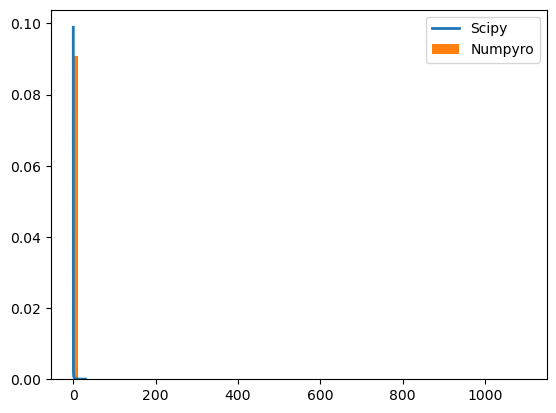

In [7]:
# Testing 'Non-informative' Prior
alpha,beta = 0.001,0.001
fig, ax = plt.subplots()
xs = np.linspace(0.01,30,100)
ys = gamma.pdf(xs, alpha, 0, 1/beta)
ax.plot(xs, ys, lw=2, label='Scipy')
plt.hist(dist.Gamma(alpha,beta).sample(rng_key,(10000,)),density=True,bins=100,label='Numpyro')
plt.legend()
plt.show()